## Q1 calclulating average sum of dice roll

In [1]:
import random

In [2]:
#Monte Carlo Simulation for dice rolls

dice = [1, 2, 3, 4, 5, 6]                    #outcomes of a dice roll

num_simulations = 1000

sum = 0                                     #cumulative sum of all die rolls to calculate the average
for i in range(num_simulations):
  current_roll = random.choice(dice)        #selecting a random number from the list depicting a dice roll
  sum += current_roll

print( " Average of the dice rolls is " + str(sum/num_simulations) )

 Average of the dice rolls is 3.567


## Q2 expected number of dice rolls until you get your first six by prob ans=6

In [3]:
dice = [1, 2, 3, 4, 5, 6]                  

num_simulations = 10000
sum = 0
for i in range(num_simulations):
    k=0
    p=0
    while (p!=6):
        k=k+1
        p=random.choice(dice)
    sum+=k     
print( " Average of the dice rolls is " + str(sum/num_simulations) )    
     
        
    

 Average of the dice rolls is 5.9117


# Getting to stocks

In [4]:
import yfinance as yf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
df=yf.download('TSLA',start='2022-8-19')

[*********************100%%**********************]  1 of 1 completed


In [6]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-19,299.000000,300.359985,292.500000,296.666656,296.666656,61395300
2022-08-22,291.913330,292.399994,286.296661,289.913330,289.913330,55843200
2022-08-23,291.453339,298.826660,287.923340,296.453339,296.453339,63984900
2022-08-24,297.563324,303.646667,296.500000,297.096680,297.096680,57259800
2022-08-25,302.359985,302.959991,291.600006,296.070007,296.070007,53230000
...,...,...,...,...,...,...
2023-08-21,221.550003,232.130005,220.580002,231.279999,231.279999,135702700
2023-08-22,240.250000,240.820007,229.550003,233.190002,233.190002,130597900
2023-08-23,229.339996,238.979996,229.289993,236.860001,236.860001,101077600


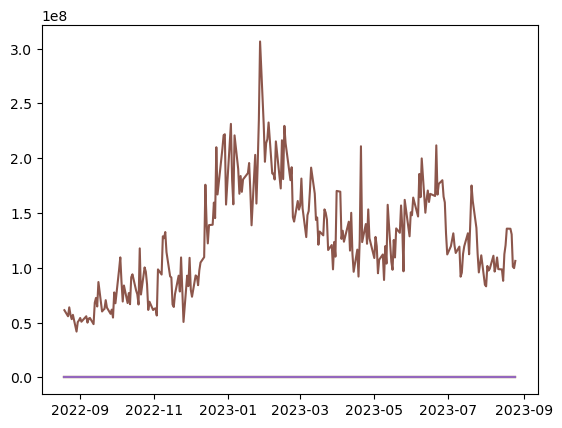

In [7]:
plt.plot(df)

In [8]:
import pandas as pd
returns=np.log(1+df['Adj Close'].pct_change())

In [9]:
returns.head()

Date
2022-08-19         NaN
2022-08-22   -0.023027
2022-08-23    0.022308
2022-08-24    0.002168
2022-08-25   -0.003462
Name: Adj Close, dtype: float64

In [10]:
# calculating u and sigma
u,sigma=returns.mean(),returns.std()
u


-0.000854362970511658

In [11]:
np.random.normal(u,sigma) # a single number generated

0.008623781408493894

In [12]:
p=np.random.normal(u,sigma,252)
p


array([ 0.04488376,  0.02106374, -0.00417974, -0.02823114,  0.00510351,
        0.06246628,  0.01266315,  0.01025578, -0.04454394,  0.01652649,
       -0.01808475,  0.03084603, -0.00661222, -0.07973771, -0.05401146,
        0.03137306, -0.05047533,  0.01232802,  0.00465912, -0.04516405,
        0.01459616, -0.03853047,  0.04174007, -0.03492775,  0.0080206 ,
        0.04389488, -0.04533775, -0.02546906,  0.0304116 , -0.03510015,
       -0.01360182, -0.04289166, -0.0046698 ,  0.03511644,  0.00539225,
       -0.02650218, -0.04834096,  0.0161169 , -0.0040331 ,  0.01346414,
        0.05845044, -0.0072231 ,  0.0146128 , -0.0234214 ,  0.06633136,
       -0.05189157, -0.0406931 , -0.03772286,  0.00780044, -0.07930991,
        0.01226411,  0.08097298,  0.04800619, -0.06273025, -0.04705417,
       -0.00418511, -0.00222542,  0.00395951, -0.03392296,  0.01744976,
       -0.07458162,  0.07856923, -0.00845475,  0.08460132,  0.02406118,
       -0.04747676,  0.01612429,  0.00802566,  0.00987288, -0.06

In [13]:
initial=df['Adj Close'].iloc[-1]

In [14]:
# exponent and compounding
np.exp(1)

2.718281828459045

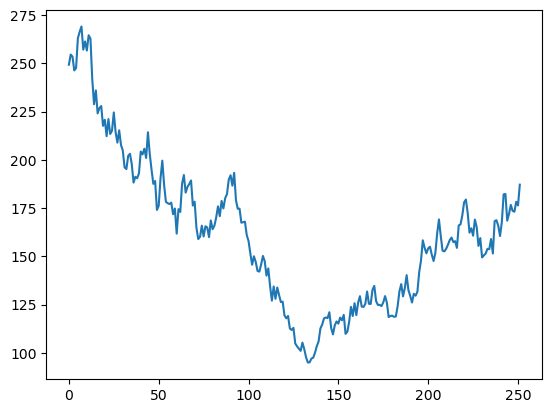

In [15]:
prices=initial*(1+p).cumprod()
plt.plot(prices)

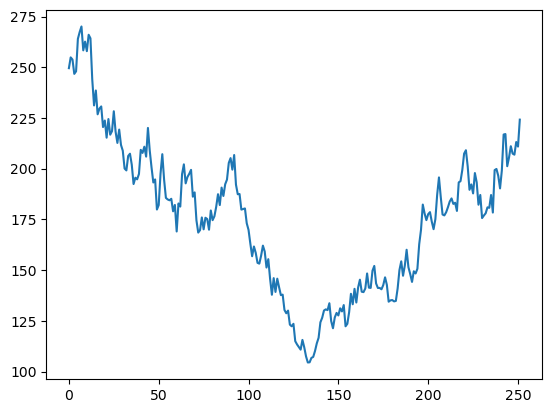

In [16]:
prices=initial*(np.exp(p.cumsum()))    
plt.plot(prices)

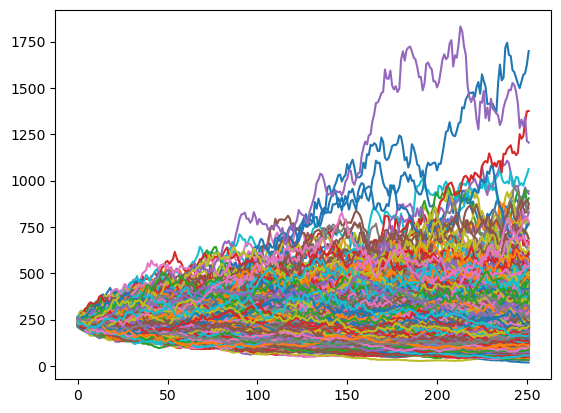

In [25]:
for i in range(1000):
    p=np.random.normal(u,sigma,252)
    prices=initial*(np.exp(p.cumsum())) 
    
    plt.plot(prices)
    
    

In [ ]:
import math
from scipy.stats import norm

In [ ]:
def option_price (ticker,initial,iterations,risk_free_rate,strike_price):
    df=yf.download(ticker,start='2022-8-19')
    returns=np.log(1+df['Adj Close'].pct_change())
    
    u,var,sigma=returns.mean(),returns.var(),returns.std()
    print('u=',u)
    sum=0
    for i in range(iterations):
        p=np.random.rand(252)
        z=norm.ppf(p)
        prices=initial*np.exp((u-var/2 + sigma*z).cumsum())
        plt.plot(prices)
        
        if (prices[-1]>=strike_price):
            sum=sum+prices[-1]-strike_price
    sum=sum/iterations
    print ('The time discounted payoff and hence price of option is', sum*math.exp(-risk_free_rate))

In [ ]:
option_price("AAPL",100,1000,0.02,120)